# 1.  Scikit-learn 소개 & 환경 설정
        - Python 기반 오픈 소스 머신 러닝 라이브러리
        - 다양한 머신러닝 알고리즘 (분류, 회귀, 클러스터링 등) 간편하게 구현 가능
        - 특장점
            - 직관적 API (fit/predict)
            - 풍부한 문서와 커뮤니티 지원
            - NumPy, SciPy, pandas와 연동 용이
        - 실습환경: Colab 사용 (별도 설정 불필요)



# 2. Estimator 기초 (Fitting & Predicting)
        % Estimator class in Scikit-learn: ML 알고리즘과 모델을 사용하기 위한 인터페이스
        % fit() method: Estimator class에 의해 구현되며 데이터를 이용한 모델 학습 수행



In [ ]:
from sklearn.ensemble import RandomForestClassifier #
clf = RandomForestClassifier (random_state=0)
X = [[1, 2, 3], [11, 12, 13]]
y= [0,1]
clf.fit(X,y)

RandomForestClassifier(random_state=0)

<Code 설명>

    - RandomForestEstimator: 결정 트리 (Deision Tree)를 이용하여 분류 (Classification)을 수행
    - X: 2개의 sample [1, 2, 3], [11,12,13]로 이루진 학습 데이터 ('sample matrix')
    - y: X에 속한 각 sample에 대응되는 레이블 ('target values')
    * X, y의 타입: numpy array 또는 배열
    - clf.fit(X,y): 생성된 Estimator 객체에 sample matrix와 target values 전달함으로 모델 학습
    * 학습 목적: 모델 예측치와 실제 값의 차이 최소화


In [ ]:
# 학습된 모델을 이용한 추론 테스트
clf.predict(X)

array([0, 1])

In [ ]:
clf.predict(([8,9,10],[7,8,9]))


array([1, 1])

Scikit-learn에서 제공되는 Estimator의 종류
 [Estimators in Scikit-learn](https://scikit-learn.org/stable/machine_learning_map.html#ml-map)

# 3. Transformers and pre-processors

*   Transformer: 입력 데이터의 형태를 변환
*   Pre-processor: Transformer의 한 부류 - 데이터 전처리 (ex. 정규화) 담당



In [ ]:
from sklearn.preprocessing import StandardScaler
X = [[0, 15],
     [1, -10]]

# compute the mean and std dev
scaler =StandardScaler().fit(X)
print ("mean:", scaler.mean_, "\nstd dev:", scaler.scale_)

# scale data according to computed scaling values
x_scaler = scaler.transform(X)
print("standardized x:", x_scaler)

#StandardScaler().fit(X).transform(X)

mean: [0.5 2.5] 
std dev: [ 0.5 12.5]
standardized x: [[-1.  1.]
 [ 1. -1.]]


<Code 설명>
- sklearn.preprocessing package: 데이터 전처리 모듈 포함
- StandardScaler: dataset을 평균이 0, 표준 편차가 1인 새 dataset으로 변환하는 기능 제공
* dataset 변환은 feature 단위로 수행
- scaler =StandardScaler().fit(X): 기존 데이의 mean, std dev 계산
- x_scaler = scaler.transform(X): 기존 데이터셋을 mean = 0 , std dev = 1이 되도록 변환 후 반환


# 4. Pipelines: chaining pre-processors and estimators
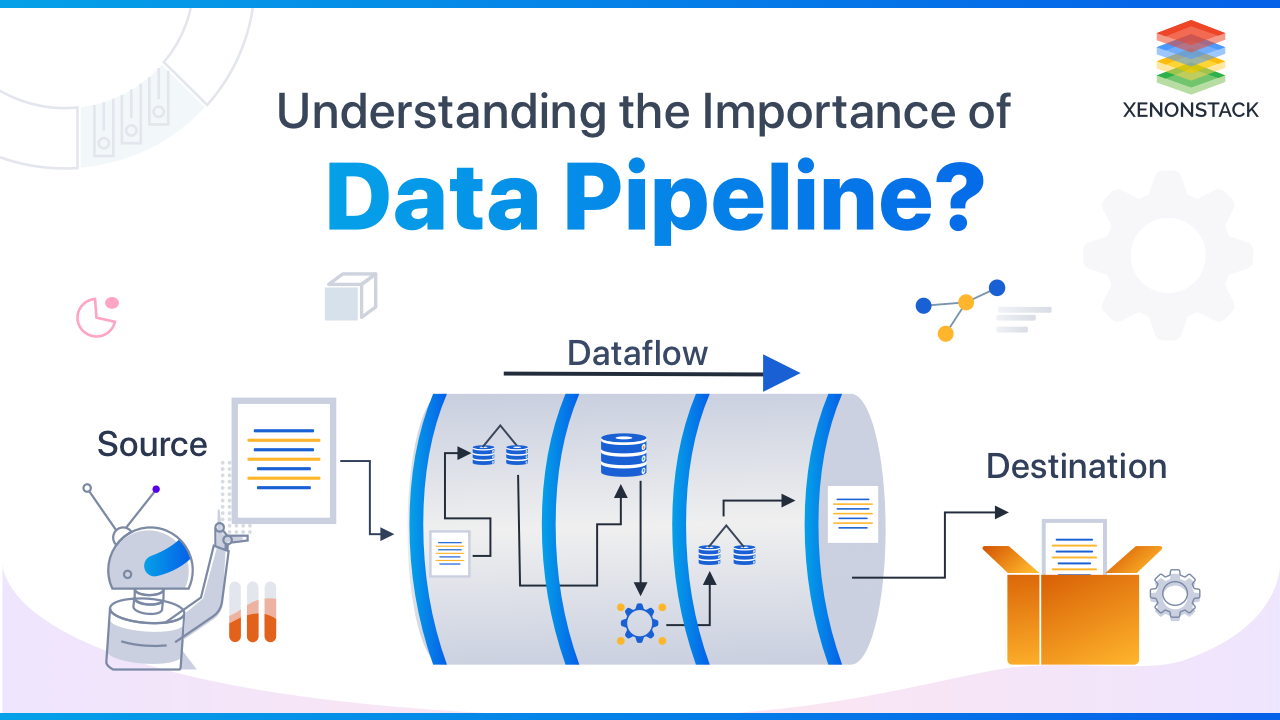 https://www.xenonstack.com/insights/data-pipeline-benefits-importance
- Scikit-learn 기반 데이터 분석 절차: 데이터 전처리 (Transform)와 추론(Estimation)이 순차적으로 실행되는 구조
- Pipeline: 데이터 전처리와 추론 과정을 하나로 묶어 주는 객체
- Pipleline 장점:
  일관성: 모델 학습과 추론에 동일 절차 적용하기에 용이
  단순성: 한 번의 fit 호출을 통해 전체 데이터 분석 수행
  재현 가능성: 동일 pipeline 사용 시, 동일 workflow 수행 > 모델 학습 및 추론 과정 재현 용이






In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# create a pipeline object
pipe = make_pipeline(
    StandardScaler(), # Transformer
    LogisticRegression() # Estimator
)
# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# fit the whole pipeline
pipe.fit(X_train, y_train)
# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

<Code 설명>

pipe = make_pipeline(
    StandardScaler(), # Transformer
    LogisticRegression() # Estimator
)
:파이프라인 객체 생성 (정규화 > 추론)

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
: 데이터셋 로딩 & 학습-테스트 데이터 구분

pipe.fit(X_train, y_train): 파이프라인 수행

accuracy_score(pipe.predict(X_test), y_test):테스트 데이터를 입력으로 모델 추론 정확도 측정

#5. Model evaluation

Cross validation:
(Q. 모델이 처음 보는 데이터를 입력 받았을 때 얼마나 일관된 추론 성능을 보이는가?)

1) 전체 데이터셋을 k개의 부분 집합으로 나눔

2) 그 중 하나를 test data로 선택, 나머지 k-1개의 부분 집합을 이용하여 모델 학습

3) 선택된 test data를 이용하여 평가

4) test data를 바꾸어 가며 위 과정 k 번 반복

5) k 개의 평가 결과 도출

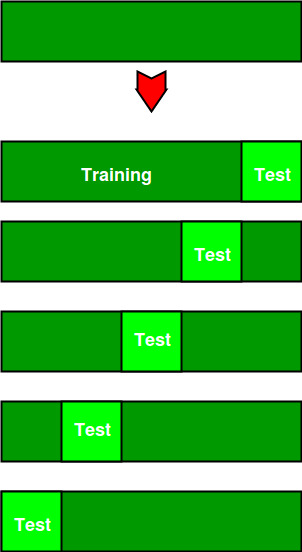

https://www.geeksforgeeks.org/machine-learning/cross-validation-machine-learning/

In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
# dataset creation
X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()
result = cross_validate(lr, X, y)  # defaults to 5-fold CV
result['test_score']  # r_squared score is high because dataset is easy


array([1., 1., 1., 1., 1.])

<code 설명>

X, y = make_regression(n_samples=1000, random_state=0): 1000개 샘플로 구성된 학습 데이터 생성 (X와 y는 선형적 관계)

lr = LinearRegression(): 추론을 위한 모델 정의

result = cross_validate(lr, X, y) :학습 데이터 중 일부를 테스트 데이터로 활용하여 교차 검증 (cross validation)

result['test_score']: 검증 결과 출력